In [16]:
from src.dataset import get_raw_training_data, get_raw_testing_data, get_labels
from src.spacy_helper import format_data_as_spacy, get_spacy_model, train, predict

from src.metrics import score
from src.visualization import plot_confusion_matrix

import numpy as np

In [17]:
raw_training_data = get_raw_training_data('./data/training_set.json')
raw_testing_data = get_raw_testing_data('./data/testing_set.json')

labels = get_labels(raw_training_data)

y_true = [r['intent'] for r in raw_testing_data]
y_true_t = [r['intent'] for r in raw_training_data]

X_train, y_train = format_data_as_spacy(raw_training_data)
X_test, y_test = format_data_as_spacy(raw_testing_data)


model = get_spacy_model(labels)

model = train(model, X_train, y_train)

Training the model...
Iteration 0/10. train_loss: 16.97067421612155
Iteration 1/10. train_loss: 1.038630685157841
Iteration 2/10. train_loss: 0.22597878472333832
Iteration 3/10. train_loss: 0.07621044556799461
Iteration 4/10. train_loss: 0.03575410377106891
Iteration 5/10. train_loss: 0.02702323833909759
Iteration 6/10. train_loss: 0.023130079846168883
Iteration 7/10. train_loss: 0.019205967288598913
Iteration 8/10. train_loss: 0.01671907001764339
Iteration 9/10. train_loss: 0.014223698318346578


In [18]:
y_pred = predict(model, X_test)
y_pred_t = predict(model, X_train)

In [19]:
training_results = score(y_true_t, y_pred_t)
testing_results = score(y_true, y_pred)

In [20]:
print(testing_results['report'])

                   precision    recall  f1-score   support

   find-around-me       0.68      0.51      0.58        67
      find-flight       0.70      0.88      0.78        24
       find-hotel       0.65      0.80      0.72        55
  find-restaurant       0.84      0.82      0.83        93
       find-train       0.75      0.86      0.80        21
       irrelevant       0.87      0.90      0.88       677
provide-showtimes       0.59      0.71      0.65        14
         purchase       0.76      0.60      0.67       114

         accuracy                           0.82      1065
        macro avg       0.73      0.76      0.74      1065
     weighted avg       0.82      0.82      0.82      1065



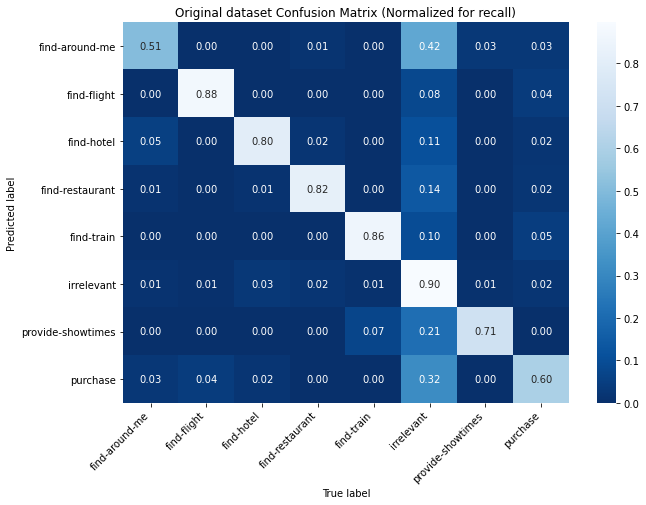

In [21]:
cm_testing_metrics = np.array(testing_results['cm'], dtype='float64')
for i in range(len(cm_testing_metrics)):
    cm_testing_metrics[i] = cm_testing_metrics[i] / np.sum(cm_testing_metrics[i])
plot_confusion_matrix(cm_testing_metrics, labels, title="Original dataset Confusion Matrix (Normalized for recall)", fmt=".2f")

In [23]:
print(training_results['report'])

                   precision    recall  f1-score   support

   find-around-me       0.98      0.92      0.95       383
      find-flight       0.90      0.99      0.94       142
       find-hotel       0.93      1.00      0.96       316
  find-restaurant       0.98      0.98      0.98       469
       find-train       0.98      0.99      0.99       143
       irrelevant       0.99      0.98      0.99      3852
provide-showtimes       0.87      0.99      0.93       117
         purchase       0.98      0.97      0.98       613

         accuracy                           0.98      6035
        macro avg       0.95      0.98      0.96      6035
     weighted avg       0.98      0.98      0.98      6035



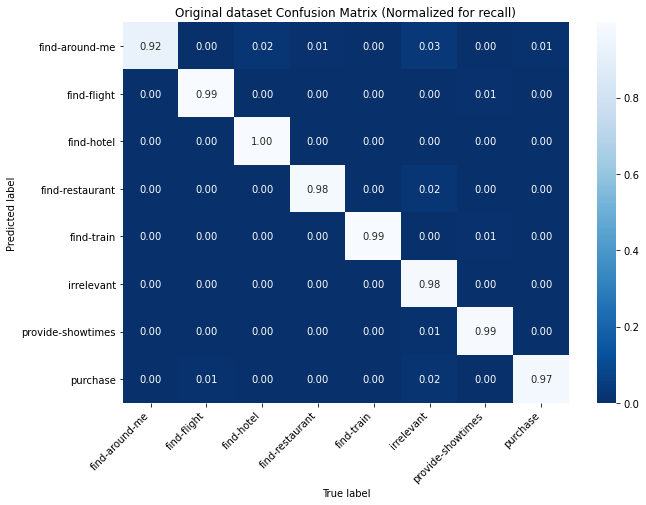

In [26]:
cm_testing_metrics = np.array(training_results['cm'], dtype='float64')
for i in range(len(cm_testing_metrics)):
    cm_testing_metrics[i] = cm_testing_metrics[i] / np.sum(cm_testing_metrics[i])
plot_confusion_matrix(cm_testing_metrics, labels, title="Original dataset Confusion Matrix (Normalized for recall)", fmt=".2f")